# TRABALHO PARTE 1 - EMISSÕES INDUSTRIA 


In [4]:
#https://www.epa.gov/sites/default/files/2020-10/documents/c11s15.pdf minha empresa de produção de vidro - AP42 CAP 11.15

import pandas as pd
import os


In [54]:
# Coletando o caminho da pasta que estou
cwd = os.getcwd()


In [55]:
# Pasta dos fatores de emissão
path = cwd+'\\tabelas\\FE'
print(path)

D:\ENS5173_01\tabelas\FE


In [56]:
# Indicando nome do arquivo
chapterNumer = 11
subChapter = 15
file = 'chp_'+str(11)+'_'+str(15)+'.csv'
print(file)
print(file_path)



chp_11_15.csv
D:\ENS5173_01\tabelas\FE\chp_11_15.csv


In [47]:
import pandas as pd

# Dados dos processos e suas siglas
processos = [
    "Melting furnace",
    "Uncontrolled",
    "lavador de baixa energia",
    "scrubber venturi",
    "filtro de mangas",
    "precipitador eletrostático",
    "Flat",
    "Uncontrolled",
    "lavador de baixa energia",
    "scrubber venturi",
    "filtro de mangas",
    "precipitador eletrostático",
    "Pressionado e soprado",
    "Uncontrolled",
    "lavador de baixa energia",
    "scrubber venturi",
    "filtro de mangas",
    "precipitador eletrostático",
    "Formação e acabamento",
    "Container",
    "Pressionado e soprado",
    "vidro de chumbo"
]

siglas = [
    "MF",
    "UC",
    "LBE",
    "SV",
    "FM",
    "PE",
    "FL",
    "UC",
    "LBE",
    "SV",
    "FM",
    "PE",
    "PS",
    "UC",
    "LBE",
    "SV",
    "FM",
    "PE",
    "FA",
    "CN",
    "PS",
    "VC"
]

# Criar DataFrame
df = pd.DataFrame({
    'Processo': processos,
    'Sigla': siglas
})

# Exibir o DataFrame
print(df)


                      Processo Sigla
0              Melting furnace    MF
1                 Uncontrolled    UC
2     lavador de baixa energia   LBE
3             scrubber venturi    SV
4             filtro de mangas    FM
5   precipitador eletrostático    PE
6                         Flat    FL
7                 Uncontrolled    UC
8     lavador de baixa energia   LBE
9             scrubber venturi    SV
10            filtro de mangas    FM
11  precipitador eletrostático    PE
12       Pressionado e soprado    PS
13                Uncontrolled    UC
14    lavador de baixa energia   LBE
15            scrubber venturi    SV
16            filtro de mangas    FM
17  precipitador eletrostático    PE
18       Formação e acabamento    FA
19                   Container    CN
20       Pressionado e soprado    PS
21             vidro de chumbo    VC


In [53]:
import pandas as pd
import os

# Definindo o nome do arquivo e os diretórios
file_name = 'chp_11_15.csv'
directories = [
    r'D:\ENS5173_01\tabelas\FE',
    r'D:\ENS5173_01\tabelas',
    r'D:\ENS5173_01'
]

# Tentar abrir o arquivo em cada diretório
file_found = False
for directory in directories:
    file_path = os.path.join(directory, file_name)
    if os.path.exists(file_path):
        try:
            fe = pd.read_csv(file_path)
            print("Arquivo encontrado em:", file_path)
            print(fe)
            file_found = True
            break  # Se encontrar o arquivo, pare o loop
        except Exception as e:
            print(f"Erro ao abrir o arquivo CSV: {e}")

if not file_found:
    print(f"O arquivo '{file_name}' não foi encontrado nos diretórios especificados.")


Arquivo encontrado em: D:\ENS5173_01\tabelas\FE\chp_11_15.csv
    Unnamed: 0                  Unnamed: 1 Unnamed: 2   Unnamed: 3  \
0          NaN                         NaN        NaN          NaN   
1          NaN                    Processo      Sigla  VOC (kg/Mg)   
2          NaN             Melting furnace         MF          NaN   
3          NaN                Uncontrolled         UC          0.1   
4          NaN    Lavador de baixa energia        LBE          0.1   
5          NaN            Scrubber venturi         SV          0.1   
6          NaN            Filtro de mangas         FM          0.1   
7          NaN  Precipitador eletrostático         PE          0.1   
8          NaN                        Flat         FL          NaN   
9          NaN                Uncontrolled         UC         <0.1   
10         NaN    Lavador de baixa energia        LBE         <0.1   
11         NaN            Scrubber venturi         SV         <0.1   
12         NaN            Fi

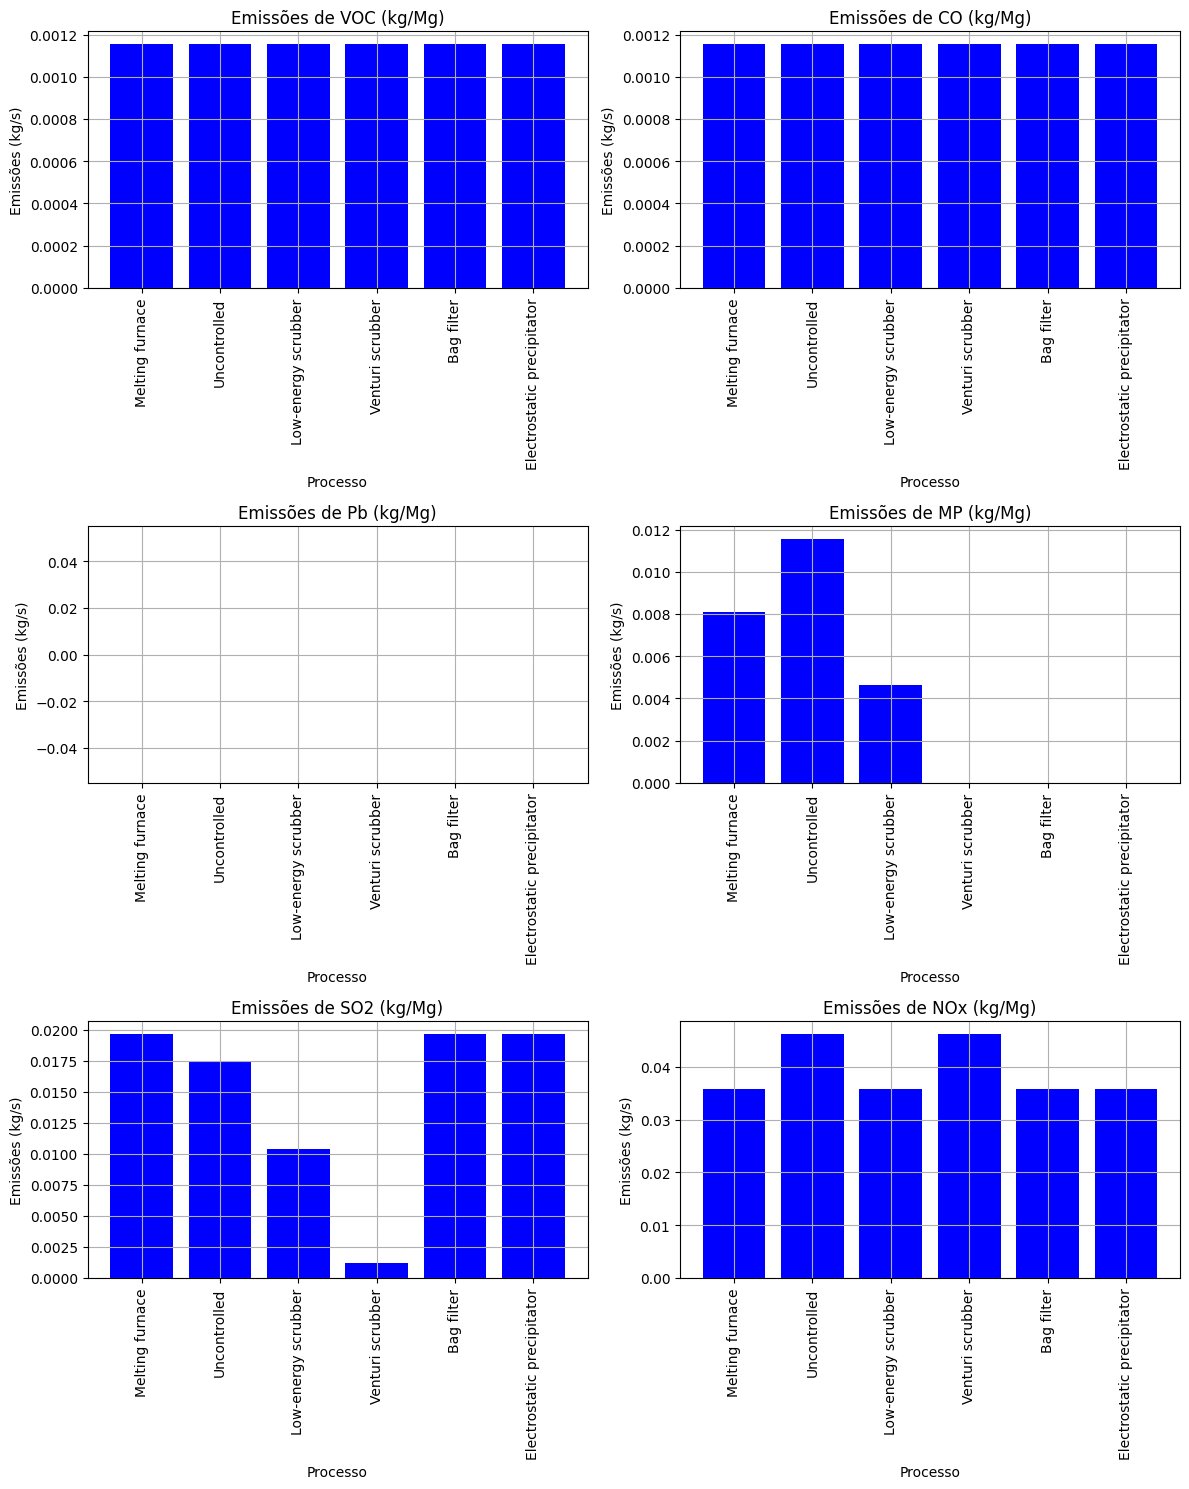

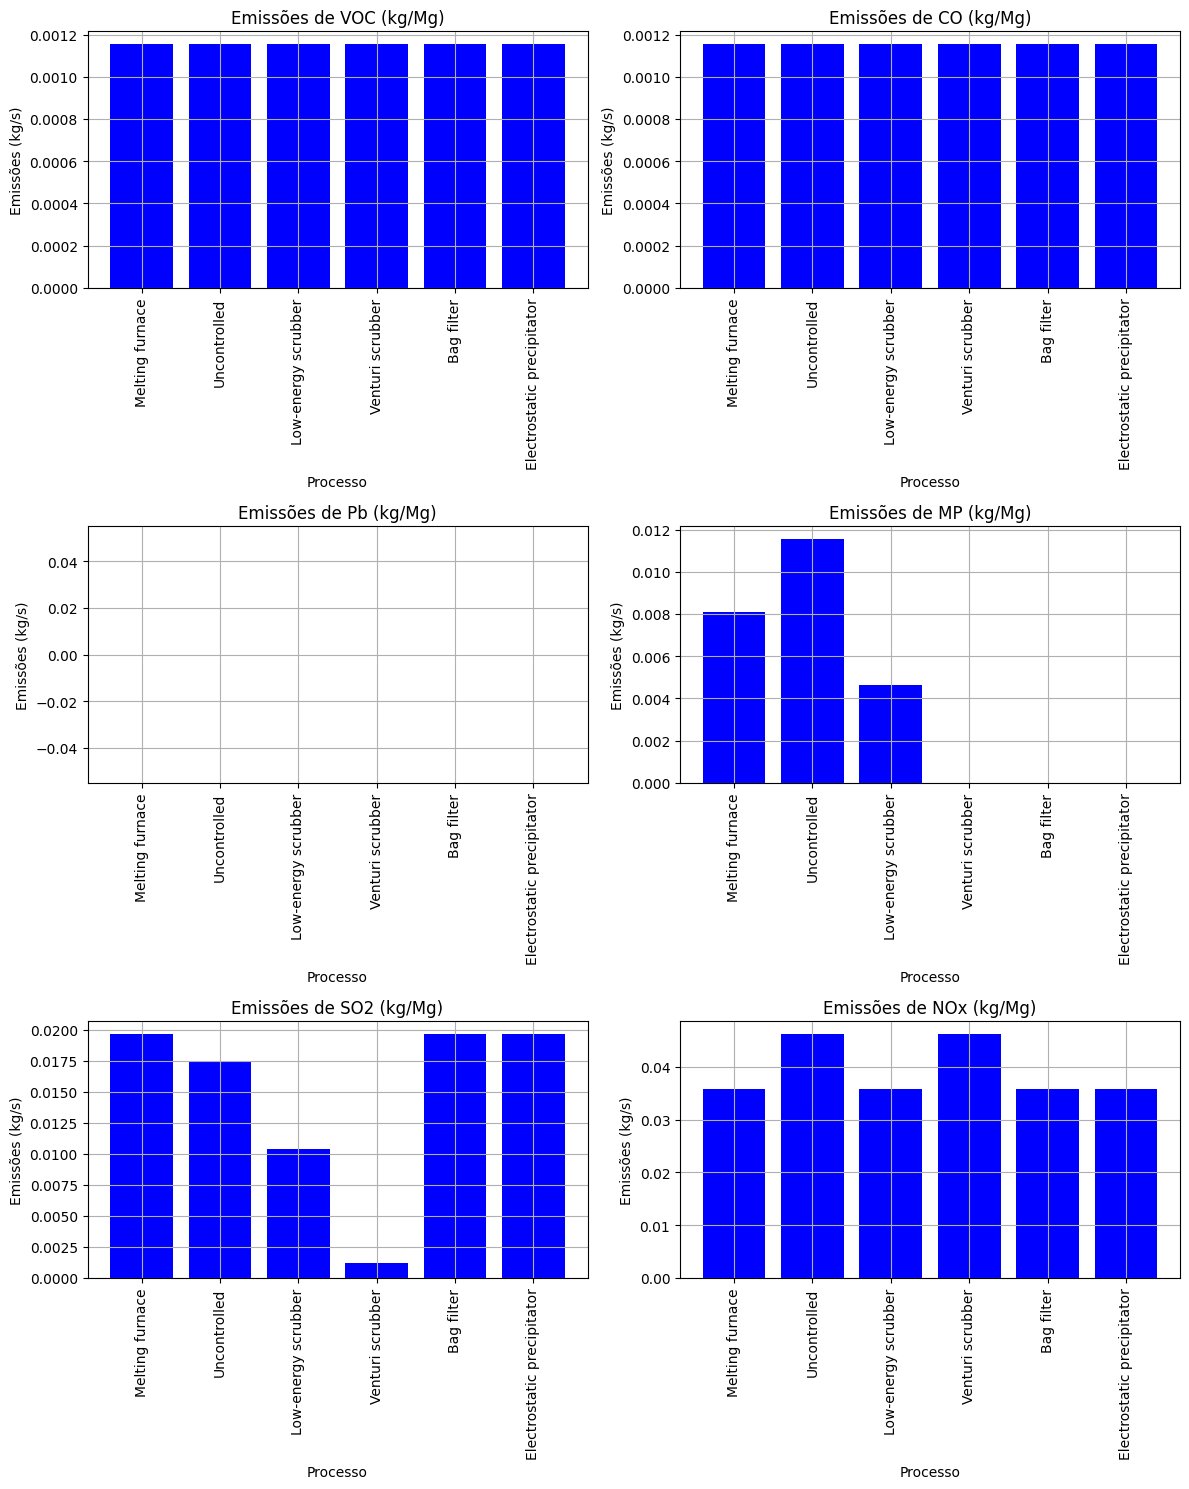

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados de exemplo
dados = {
    'Processo': ['Melting furnace', 'Uncontrolled', 'Low-energy scrubber', 'Venturi scrubber', 'Bag filter', 'Electrostatic precipitator'],
    'Sigla': ['MF', 'UC', 'LES', 'VS', 'BF', 'EP'],
    'VOC (kg/Mg)': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    'CO (kg/Mg)': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    'Pb (kg/Mg)': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'MP (kg/Mg)': [0.7, 1.0, 0.4, 0.0, 0.0, 0.0],
    'SO2 (kg/Mg)': [1.7, 1.5, 0.9, 0.1, 1.7, 1.7],
    'NOx (kg/Mg)': [3.1, 4.0, 3.1, 4.0, 3.1, 3.1]
}

# Criando DataFrame a partir dos dados
df = pd.DataFrame(dados)

# Convertendo de kg/Mg para kg/s
df.iloc[:, 2:] *= (1000) / (24 * 3600)  # Convertendo de kg/Mg para kg/s

# Definindo os processos
processos = df['Processo']

# Definindo as emissões de VOC, CO, Pb, MP, SO2 e NOx para cada processo
emissoes = df.drop(columns=['Processo', 'Sigla'])

# Plotando as emissões para cada poluente e processo
plt.figure(figsize=(12, 15))

# Iterando sobre cada poluente
for idx, poluente in enumerate(emissoes.columns):
    plt.subplot(3, 2, idx+1)
    plt.bar(processos, emissoes[poluente], color='blue')
    plt.title(f'Emissões de {poluente}')
    plt.ylabel('Emissões (kg/s)')
    plt.xlabel('Processo')
    plt.xticks(rotation=90)
    plt.grid(True)

plt.tight_layout()
plt.show()

# Exportando o gráfico como um arquivo PNG
plt.figure(figsize=(12, 15))

# Iterando sobre cada poluente
for idx, poluente in enumerate(emissoes.columns):
    plt.subplot(3, 2, idx+1)
    plt.bar(processos, emissoes[poluente], color='blue')
    plt.title(f'Emissões de {poluente}')
    plt.ylabel('Emissões (kg/s)')
    plt.xlabel('Processo')
    plt.xticks(rotation=90)
    plt.grid(True)

# Exportando o gráfico como um arquivo PNG
plt.savefig('D:/ENS5173_01/figures/poluentes_e_processos.png')

plt.tight_layout()
plt.show()


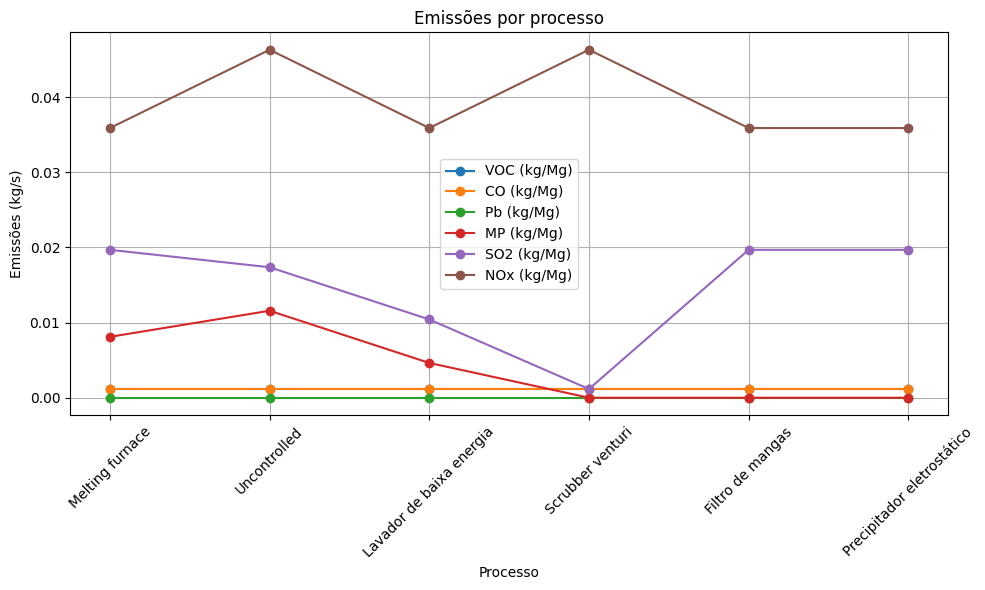

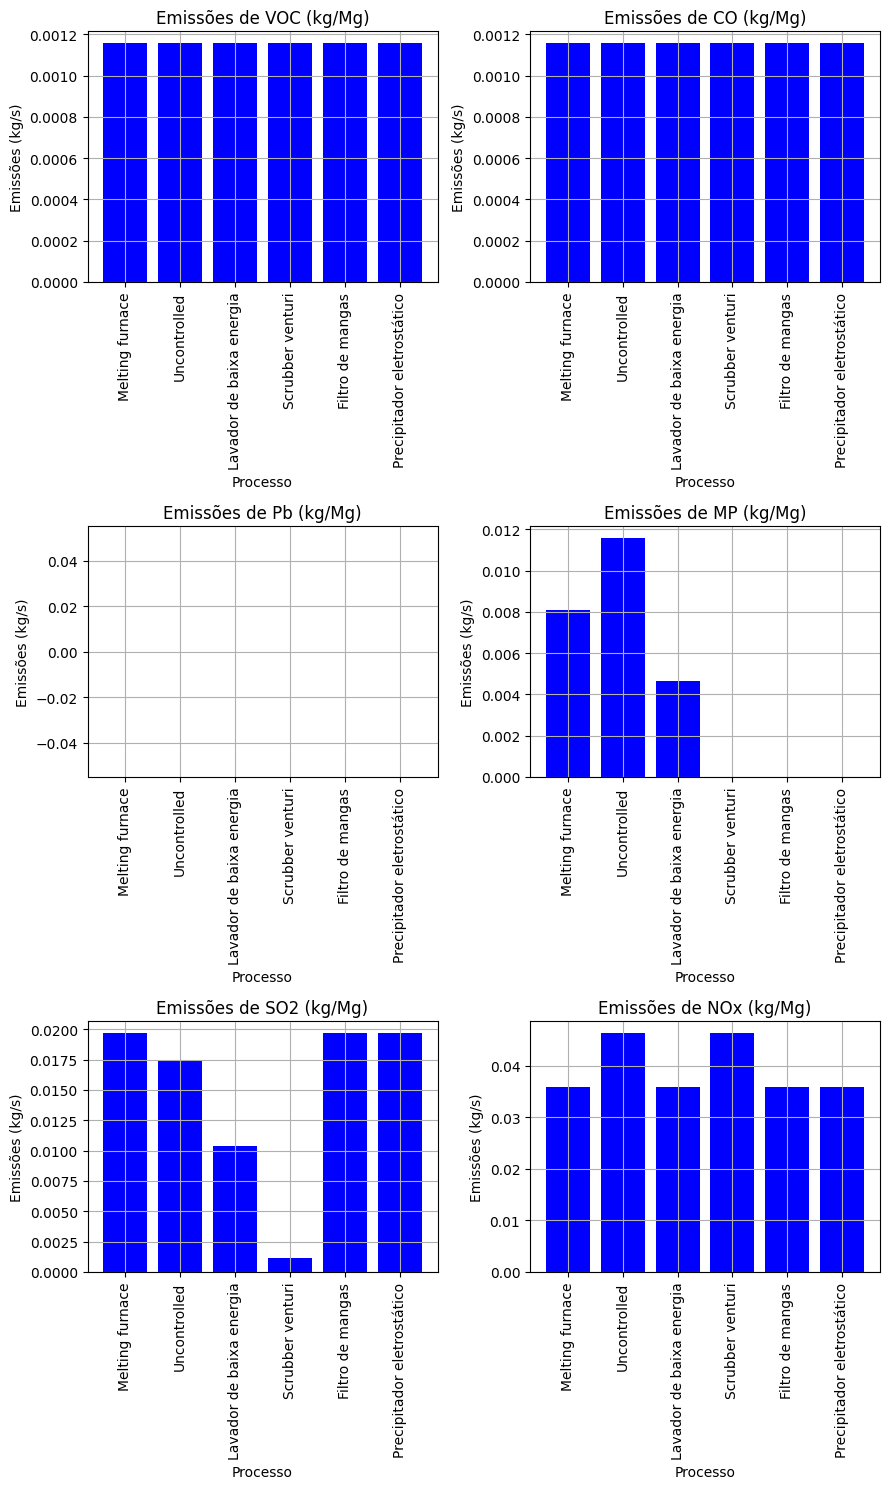

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados de exemplo
dados = {
    'Processo': ['Melting furnace', 'Uncontrolled', 'Lavador de baixa energia', 'Scrubber venturi', 'Filtro de mangas', 'Precipitador eletrostático'],
    'Sigla': ['MF', 'UC', 'LBE', 'SV', 'FM', 'PE'],
    'VOC (kg/Mg)': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    'CO (kg/Mg)': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    'Pb (kg/Mg)': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'MP (kg/Mg)': [0.7, 1.0, 0.4, 0.0, 0.0, 0.0],
    'SO2 (kg/Mg)': [1.7, 1.5, 0.9, 0.1, 1.7, 1.7],
    'NOx (kg/Mg)': [3.1, 4.0, 3.1, 4.0, 3.1, 3.1]
}

# Criando DataFrame a partir dos dados
df = pd.DataFrame(dados)

# Convertendo de kg/Mg para kg/s
df.iloc[:, 2:] *= 1000 / (24 * 3600)  # Convertendo de kg/Mg para kg/s

# Definindo os processos
processos = df['Processo']

# Definindo as emissões de VOC, CO, Pb, MP, SO2 e NOx para cada processo
emissoes = df.drop(columns=['Processo', 'Sigla'])

# Plotando as emissões para cada poluente e processo
plt.figure(figsize=(10, 6))

# Iterando sobre cada poluente
for idx, poluente in enumerate(emissoes.columns):
    plt.plot(processos, emissoes[poluente], marker='o', label=poluente)

plt.title('Emissões por processo')
plt.xlabel('Processo')
plt.ylabel('Emissões (kg/s)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotando as emissões para cada poluente e processo
plt.figure(figsize=(9, 15))

# Iterando sobre cada poluente
for idx, poluente in enumerate(emissoes.columns):
    plt.subplot(3, 2, idx+1)
    plt.bar(processos, emissoes[poluente], color='blue')
    plt.title(f'Emissões de {poluente}')
    plt.ylabel('Emissões (kg/s)')
    plt.xlabel('Processo')
    plt.xticks(rotation=90)
    plt.grid(True)

plt.tight_layout()

# Exportando o gráfico como um arquivo PNG
plt.savefig('D:/ENS5173_01/figures/comparacao_processos.png')

plt.show()




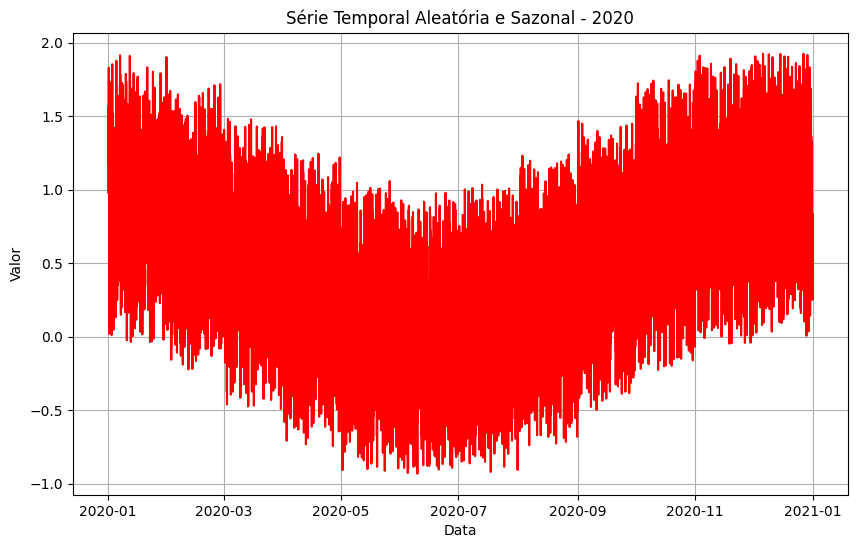

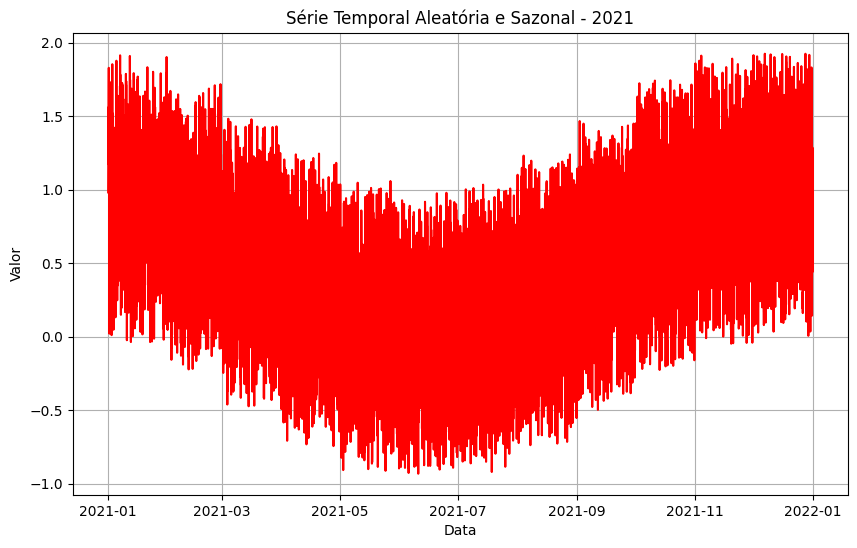

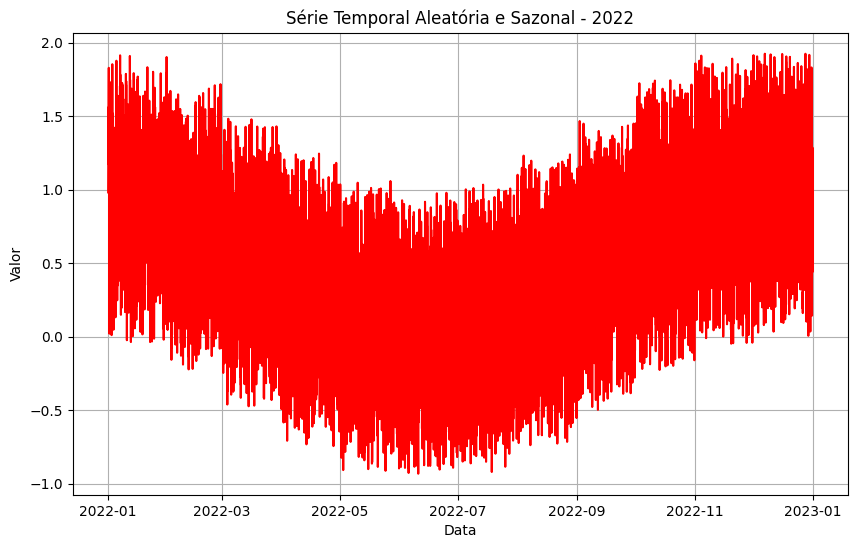

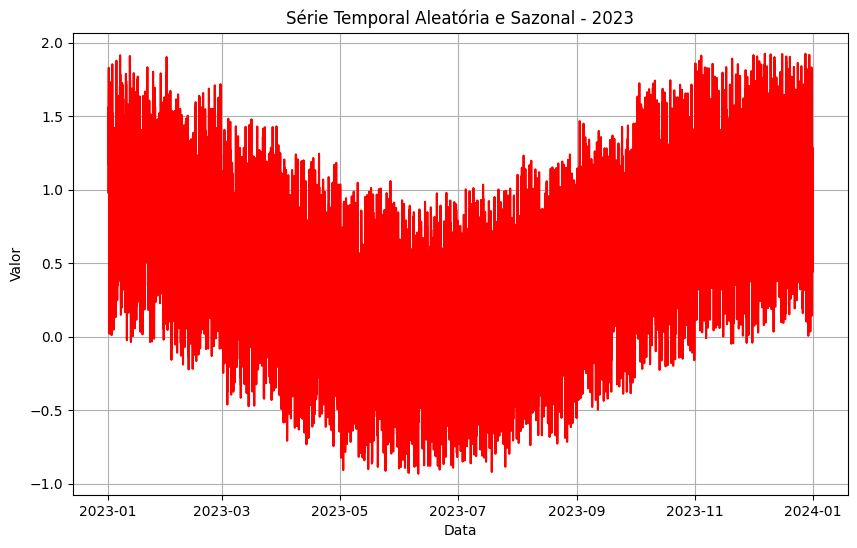

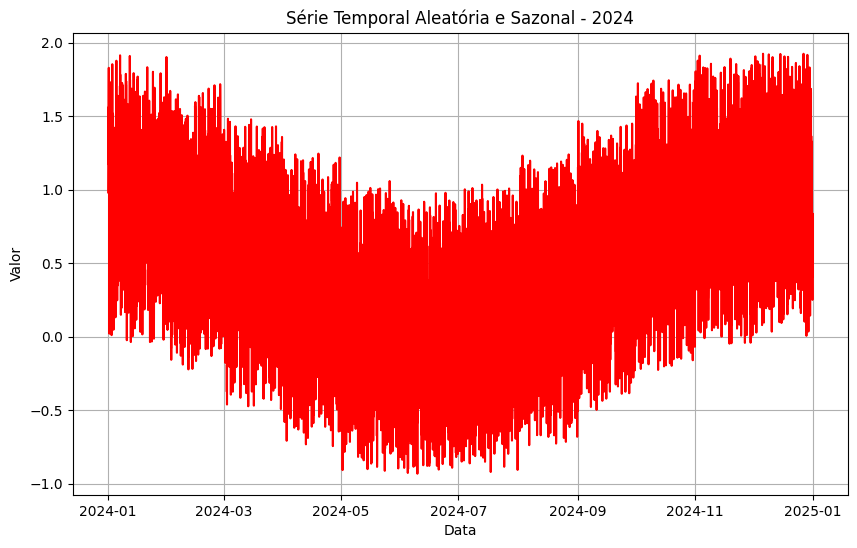

<Figure size 640x480 with 0 Axes>

In [64]:
# FAZENDO SAZONALIDADE E ALEATORIEDADE

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_seasonal_data(path, year):
    # Verificar se o diretório existe, senão, criá-lo
    if not os.path.exists(path):
        os.makedirs(path)
    
    # Criando um intervalo de datas para o ano especificado
    dates = pd.date_range(start=str(year), end=str(year+1), freq='h')
    
    # Criando um DataFrame com as datas
    df = pd.DataFrame({'datetime': dates})
    
    # Adicionando colunas para ano, mês, dia e hora
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    
    # Criando uma coluna de valores aleatórios
    np.random.seed(0)  # Para garantir que os resultados sejam reproduzíveis
    df['random'] = np.random.rand(len(df))
    
    # Adicionando uma componente sazonal
    df['seasonal'] = np.cos(2 * np.pi * df['month'] / 12) + np.sin(2 * np.pi * df['hour'] / 24)
    
    # Criando a série temporal combinando a aleatoriedade e a sazonalidade
    df['timeSeries'] = df['random'] + 0.5 * df['seasonal']
    
    # Salvando os dados em um arquivo CSV
    filename = f"{path}/seasonal_data_{year}.csv"
    df.to_csv(filename, index=False)
    
    # Plotando a série temporal
    plt.figure(figsize=(10, 6))
    plt.plot(df['datetime'], df['timeSeries'], color='red')
    plt.title(f'Série Temporal Aleatória e Sazonal - {year}')
    plt.xlabel('Data')
    plt.ylabel('Valor')
    plt.grid(True)
    plt.savefig(f"{path}/seasonal_plot_{year}.png")
    plt.show()

# Exemplo de uso
path = "D:/ENS5173_01/seasonal_data"
for year in range(2020, 2025):
    generate_seasonal_data(path, year)


# Exportando o gráfico como um arquivo PNG
plt.savefig('D:/ENS5173_01/figures/SERIE_ALEATORIA_SAZONAL.png')


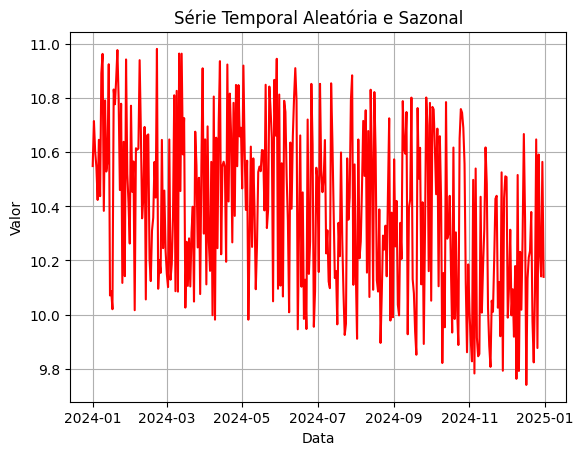

<Figure size 640x480 with 0 Axes>

In [67]:
#CRIANDO DATAS PARA SERIE TEMPORAL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Criando um DataFrame de exemplo com datas
dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
df = pd.DataFrame({'datetime': dates})

# Adicionando colunas de ano, mês e dia
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

# Criando uma componente sazonal
tt = np.arange(0, df.shape[0], 1)
df['sazonal'] = np.cos(tt / (360 * 4))

# Gerando uma série temporal aleatória
np.random.seed(0)
df['random'] = np.random.rand(len(df))
df['timeSeries'] = 10 * df['sazonal'] + df['random']

# Plotando a série temporal
plt.plot(df['datetime'], df['timeSeries'], color='red')
plt.title('Série Temporal Aleatória e Sazonal')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

# Exportando o gráfico como um arquivo PNG
plt.savefig('D:/ENS5173_01/figures/SERIE_TEMPORAL_E_SAZONAL_01.png')

In [68]:
# CRIANDO DATA FRAME COM DATAS 
import pandas as pd
import numpy as np

# Criando um intervalo de datas
dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Criando um DataFrame com as datas
df = pd.DataFrame({'datetime': dates})

# Adicionando colunas de valores aleatórios, ano, mês e dia
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
df['random'] = np.random.rand(len(df))
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

# Criando uma componente sazonal
tt = np.arange(0, df.shape[0], 1)
df['sazonal'] = np.cos(tt / (360 * 4))

# Criando a série temporal combinando a aleatoriedade e a sazonalidade
df['timeSeries'] = 10 * df['sazonal'] + df['random']

# Exibindo o DataFrame
print(df)


      datetime    random  year  month  day   sazonal  timeSeries
0   2024-01-01  0.548814  2024      1    1  1.000000   10.548814
1   2024-01-02  0.715189  2024      1    2  1.000000   10.715187
2   2024-01-03  0.602763  2024      1    3  0.999999   10.602754
3   2024-01-04  0.544883  2024      1    4  0.999998   10.544861
4   2024-01-05  0.423655  2024      1    5  0.999996   10.423616
..         ...       ...   ...    ...  ...       ...         ...
361 2024-12-27  0.903984  2024     12   27  0.968740   10.591388
362 2024-12-28  0.543806  2024     12   28  0.968568   10.229485
363 2024-12-29  0.456911  2024     12   29  0.968395   10.140860
364 2024-12-30  0.882041  2024     12   30  0.968221   10.564256
365 2024-12-31  0.458604  2024     12   31  0.968048   10.139079

[366 rows x 7 columns]


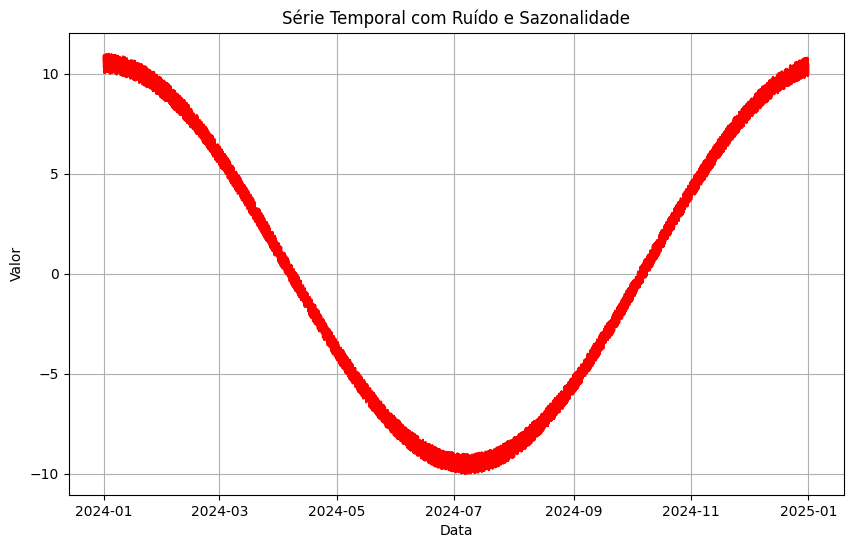

,datetime,year,month,day,random,sazonal,timeSeries
datetime,,,,,,,
2024-01-01 00:00:00,2024-01-01 00:00:00,2024,1,1,0.341576,1.000000,10.341576
2024-01-01 01:00:00,2024-01-01 01:00:00,2024,1,1,0.901145,1.000000,10.901143
2024-01-01 02:00:00,2024-01-01 02:00:00,2024,1,1,0.582217,0.999999,10.582208
2024-01-01 03:00:00,2024-01-01 03:00:00,2024,1,1,0.843352,0.999998,10.843330
2024-01-01 04:00:00,2024-01-01 04:00:00,2024,1,1,0.244359,0.999996,10.244321
...,...,...,...,...,...,...,...
2024-12-31 19:00:00,2024-12-31 19:00:00,2024,12,31,0.556256,0.982630,10.382556
2024-12-31 20:00:00,2024-12-31 20:00:00,2024,12,31,0.552160,0.982759,10.379746
2024-12-31 21:00:00,2024-12-31 21:00:00,2024,12,31,0.142539,0.982887,9.971407


In [75]:
#criando função

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def noiseCreation(path, year):
    """
    Esta função cria um ruído com sazonalidade.
    
    Inputs:
        path: Caminho para salvar o arquivo CSV.
        year: Ano para o qual os dados serão gerados.
    
    Criado por Muriell
    """
    
    # Criando um DataFrame
    df = pd.DataFrame()
    
    # Criando vetor temporal
    dtime = np.arange(np.datetime64(str(year) + "-01-01"), np.datetime64(str(year + 1) + "-01-01"), np.timedelta64(1, "h"))
    
    # Adicionando as datas ao DataFrame
    df["datetime"] = dtime
    
    # Definindo o índice como a coluna de datetime
    df = df.set_index(df["datetime"])
    
    # Criando colunas com ano, mês e dia
    df["year"] = df.index.year
    df["month"] = df.index.month
    df["day"] = df.index.day
    
    # Criando uma coluna com valores aleatórios
    df["random"] = np.random.rand(df.shape[0])
    
    # Adicionando sazonalidade
    tt = np.arange(0, df.shape[0], 1)
    df["sazonal"] = np.cos(tt / (360 * 4))
    
    # Criando a série temporal combinando aleatoriedade e sazonalidade
    df["timeSeries"] = 10 * df["sazonal"] + df["random"]
    
    # Plotando a série temporal
    plt.figure(figsize=(10, 6))
    plt.plot(df["datetime"], df["timeSeries"], color="red")
    plt.title("Série Temporal com Ruído e Sazonalidade")
    plt.xlabel("Data")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.savefig(f"{path}/noise_{year}.png")
    plt.show()
    
    # Salvando os dados em um arquivo CSV
    df.to_csv(f"{path}/noise_{year}.csv", index=False)
    
    return df

# Exemplo de uso
path = "D:/ENS5173_01/seasonal_data"

year = 2024
noiseCreation(path, year)


2002


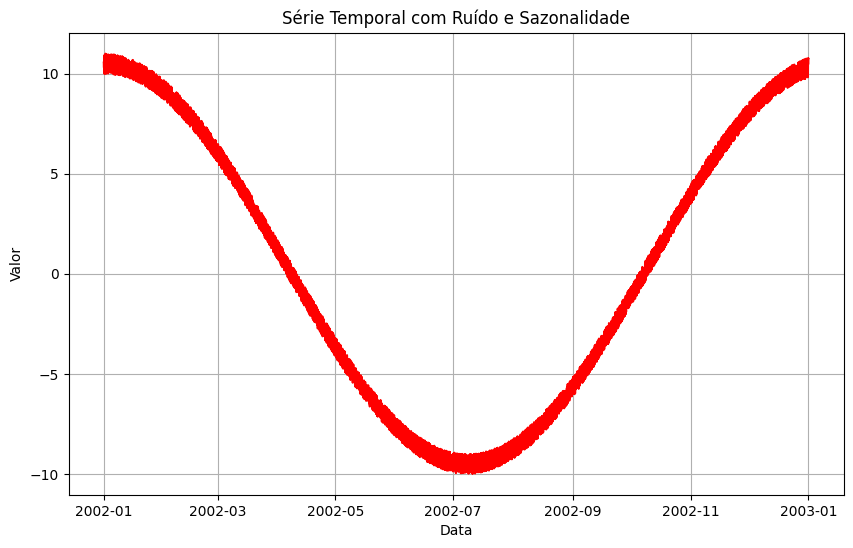

2003


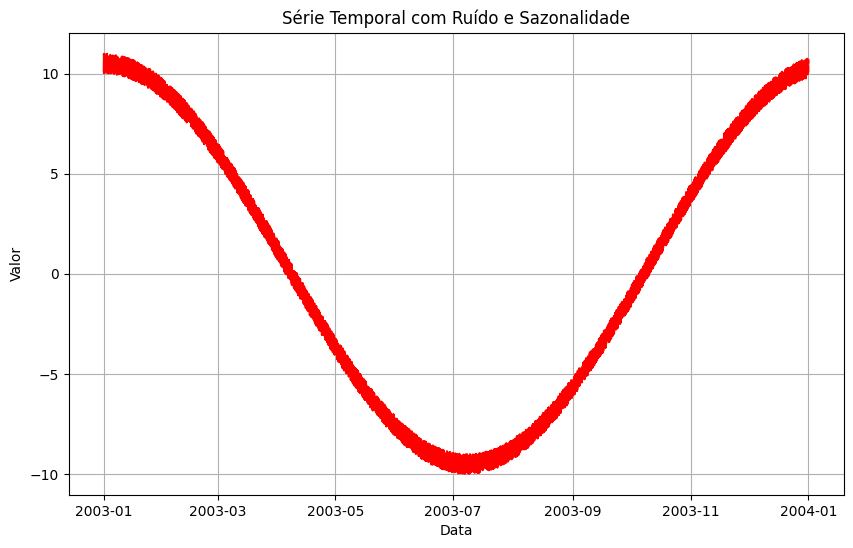

2004


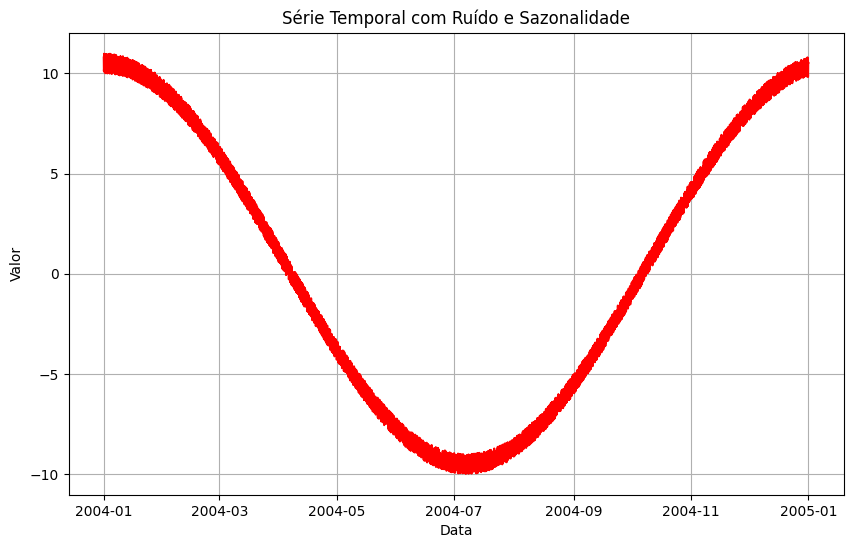

2005


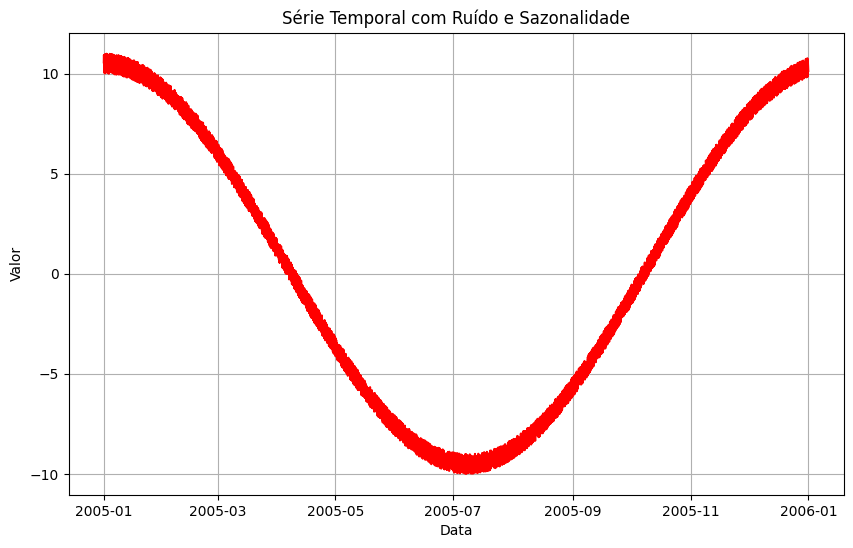

2006


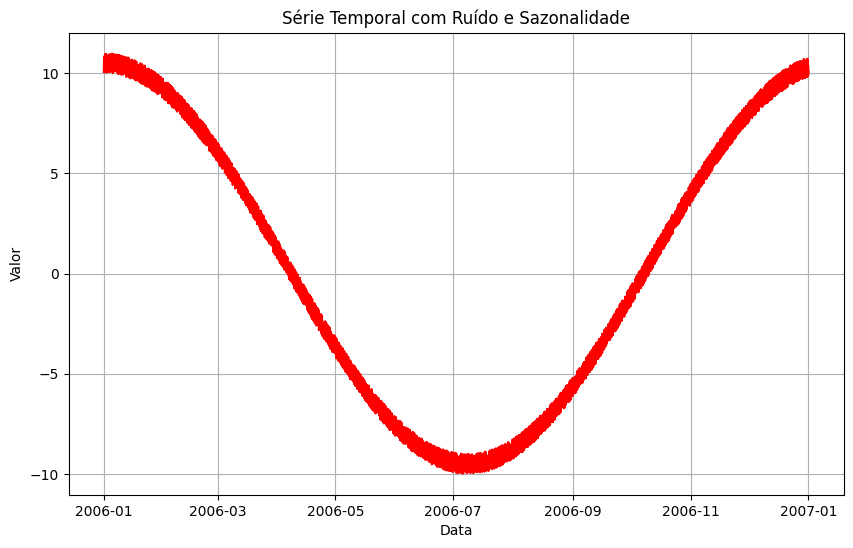

2007


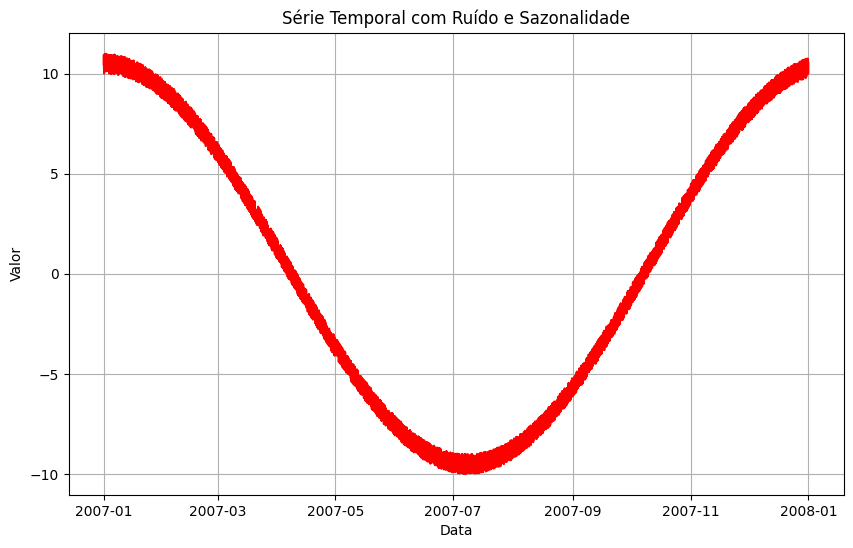

2008


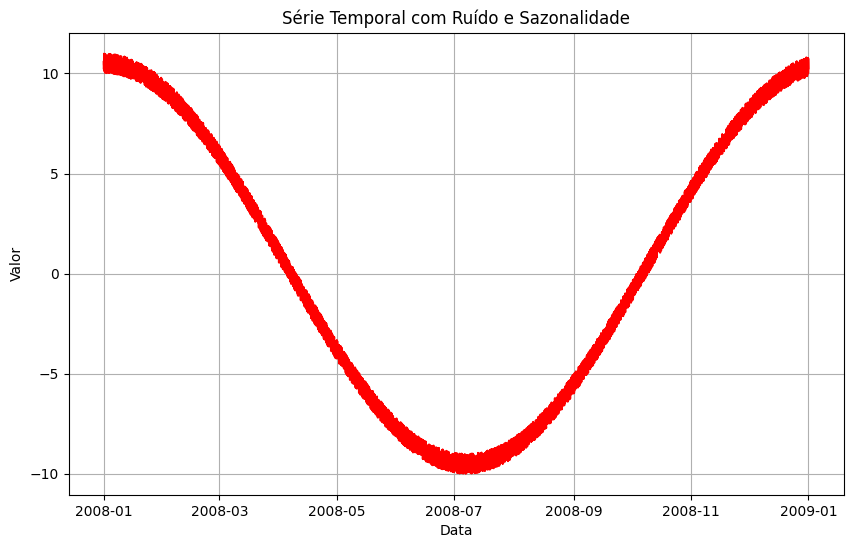

2009


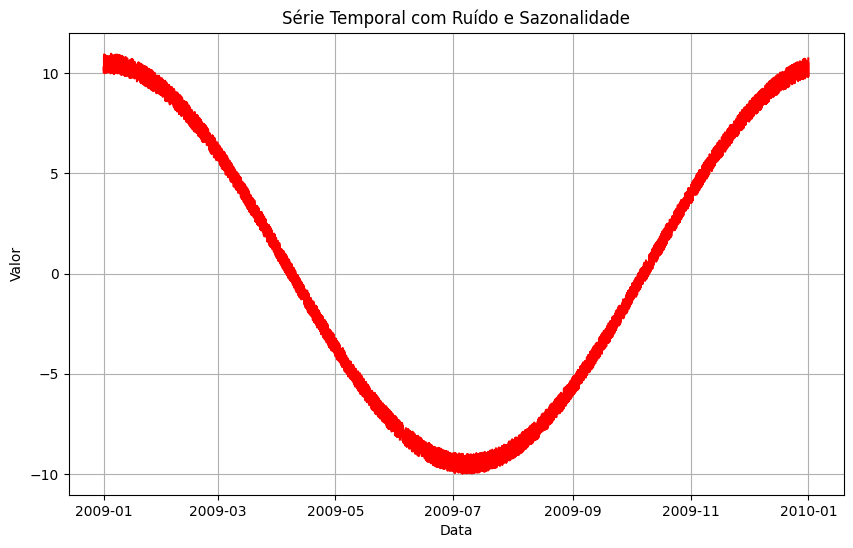

In [72]:
# Primeira opção de loop
for ii in range(2002,2010):
    print(ii)
    df = noiseCreation(path,ii)

In [81]:
# Médias diárias
import pandas as pd

# Caminho do arquivo CSV
path = r'D:\ENS5173_01\dados\brutos\metar.csv'

# Carregar os dados do arquivo CSV para um DataFrame
data = pd.read_csv(path)

# Calcular as médias diárias
dailyAve = data.groupby(['year','month','day']).mean()
dailyAve = dailyAve.reset_index()

# Converter as colunas 'year', 'month' e 'day' para datetime
df = pd.DataFrame({'year': dailyAve['year'],
                   'month': dailyAve['month'],
                   'day': dailyAve['day']})
df = pd.to_datetime(df)
dailyAve['datetime'] = df
dailyAve = dailyAve.set_index(['datetime'])

# Plotar a umidade média diária
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot(dailyAve.index, dailyAve['relh'])
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\ENS5173_01\\dados\\brutos\\metar.csv'

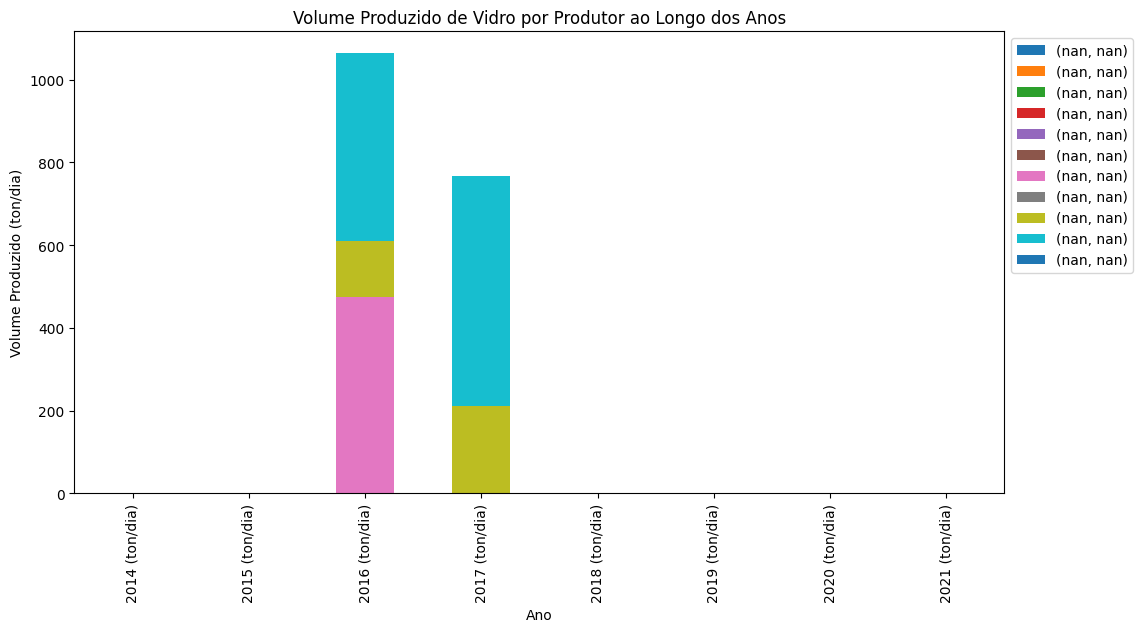

In [73]:
#fazendo o panorama Capacidade nominal de produção de vidros planos (t/dia) da industria de vidro no brasil 


import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo CSV
caminho_arquivo = r'D:\ENS5173_01\tabelas\PROD_BR\PROD_IND_VIDRO.csv'

# Definindo nomes para as colunas
nomes_colunas = ['produtor', 'Planta', '2014 (ton/dia)', '2015 (ton/dia)', '2016 (ton/dia)', '2017 (ton/dia)', '2018 (ton/dia)', '2019 (ton/dia)', '2020 (ton/dia)', '2021 (ton/dia)']

# Leia o arquivo CSV e armazene-o em um DataFrame
df = pd.read_csv(caminho_arquivo, encoding='utf-8', names=nomes_colunas, skiprows=1)

# Convertendo as colunas numéricas para o tipo correto
colunas_numericas = ['2014 (ton/dia)', '2015 (ton/dia)', '2016 (ton/dia)', '2017 (ton/dia)', '2018 (ton/dia)', '2019 (ton/dia)', '2020 (ton/dia)', '2021 (ton/dia)']
df[colunas_numericas] = df[colunas_numericas].apply(pd.to_numeric, errors='coerce')

# Transpondo o DataFrame para que os anos se tornem linhas e os produtores se tornem colunas
df = df.set_index(['produtor', 'Planta']).T

# Plotando o gráfico de barras empilhadas
ax = df.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adicionando título e rótulos dos eixos
plt.title('Volume Produzido de Vidro por Produtor ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Volume Produzido (ton/dia)')

# Exibindo a legenda fora do gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Mostrando o gráfico
plt.show()


In [41]:
# COMPARANDO EMISSÕES DA INDUSTRIA BRASILEIRA - DE ACORDO COM O INVENTÁRIO A PARTIR DOS DADOS DE CADA EMPRESA, DE PROCESSOS COM CONTROLE E SEM CONTROLE 


# Valores das emissões sem controle (kg/d)
emissoes_sem_controle = {
    'Embalagem': {'MP': 5452.32, 'SOx': 18420.00, 'NOx': 26158.80},
    'Plano': {'MP': 2724.00, 'SOx': 22700.00, 'NOx': 29845.00},
    'Doméstico': {'MP': 6463.80, 'SOx': 2565.00, 'NOx': 3770.00},
    'Especiais': {'MP': 617.7, 'SOx': 3697.30, 'NOx': 83718.02},
    'Total': {'MP': 15257.82, 'SOx': 47382.30, 'NOx': 143491.82}
}

# Valores das emissões com controle (kg/d)
emissoes_com_controle = {
    'Embalagem': {'MP': 474.24, 'SOx': 4373.03, 'NOx': 4469.48},
    'Plano': {'MP': 1071.50, 'SOx': 6048.90, 'NOx': 17940.30},
    'Doméstico': {'MP': 135.28, 'SOx': 210.31, 'NOx': 1554.72},
    'Especiais': {'MP': 453.86, 'SOx': 557.89, 'NOx': 3222.27},
    'Total': {'MP': 2134.88, 'SOx': 11190.13, 'NOx': 27186.77}
}

# Função para converter os valores de kg/d para kg/s
def kg_d_to_kg_s(valor_kg_d):
    return valor_kg_d / 86400

# Dicionário para armazenar as diferenças de emissões (kg/s)
diferencas_emissoes = {}

# Calcular as diferenças para cada tipo de vidro e para o total
for tipo_vidro in emissoes_sem_controle.keys():
    diferencas_emissoes[tipo_vidro] = {}
    for poluente in emissoes_sem_controle[tipo_vidro].keys():
        valor_sem_controle = emissoes_sem_controle[tipo_vidro][poluente]
        valor_com_controle = emissoes_com_controle[tipo_vidro][poluente]
        diferenca = kg_d_to_kg_s(valor_sem_controle) - kg_d_to_kg_s(valor_com_controle)
        diferencas_emissoes[tipo_vidro][poluente] = diferenca

# Exibir as diferenças de emissões
print("Diferenças de emissões (kg/s):")
for tipo_vidro, valores in diferencas_emissoes.items():
    print(f"{tipo_vidro}:")
    for poluente, diferenca in valores.items():
        print(f"  {poluente}: {diferenca:.2f} kg/s")


Diferenças de emissões (kg/s):
Embalagem:
  MP: 0.06 kg/s
  SOx: 0.16 kg/s
  NOx: 0.25 kg/s
Plano:
  MP: 0.02 kg/s
  SOx: 0.19 kg/s
  NOx: 0.14 kg/s
Doméstico:
  MP: 0.07 kg/s
  SOx: 0.03 kg/s
  NOx: 0.03 kg/s
Especiais:
  MP: 0.00 kg/s
  SOx: 0.04 kg/s
  NOx: 0.93 kg/s
Total:
  MP: 0.15 kg/s
  SOx: 0.42 kg/s
  NOx: 1.35 kg/s


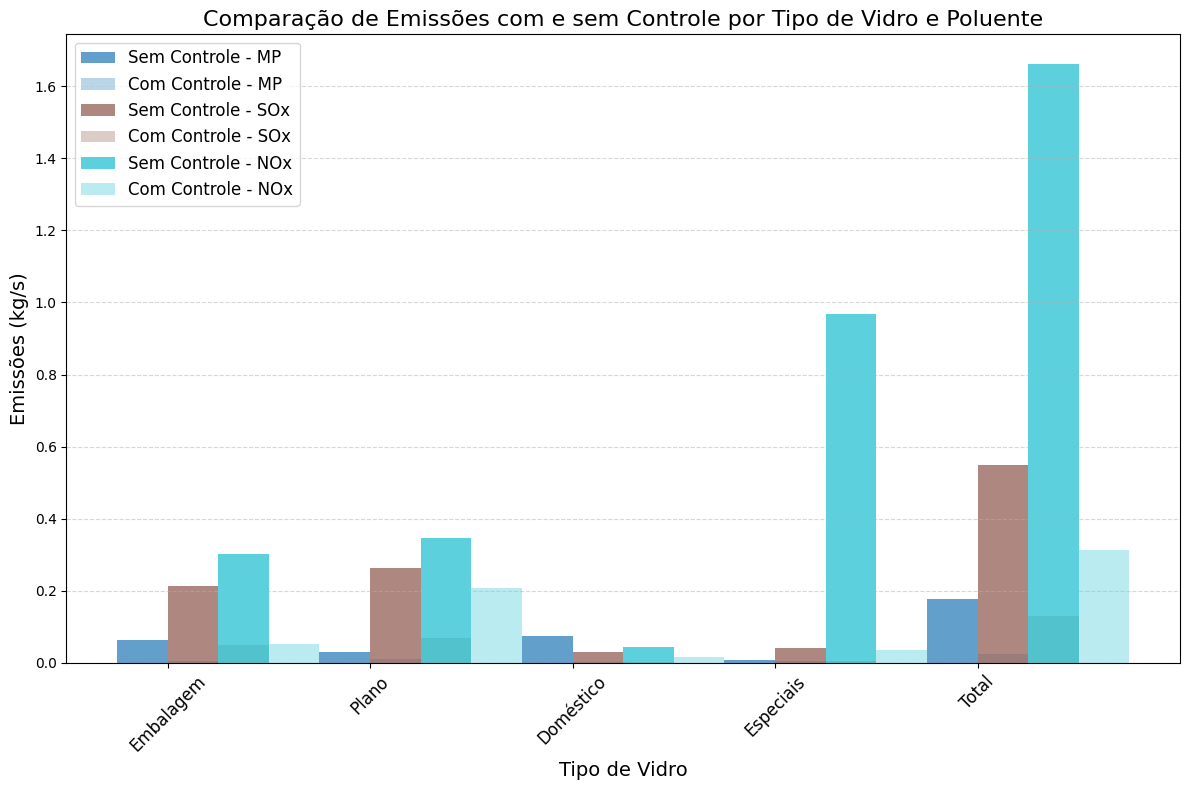

Figura salva em: D:\ENS5173_01\figures\EMISSOES_COM_E_SEM_CONTROLE_IND_BR.png


In [74]:
#FAZENDO GRAFICO DE COMPARAÇÃO DAS EMISSOES PARA CADA TIPO DE VIDRO, DADOS DA INDUSTRI BRASILEIRA ( PROCESSOS COM CONTROLE X SEM CONTROLE)
import matplotlib.pyplot as plt
import numpy as np
import os

# Função para converter kg/d para kg/s
def kg_por_segundo(valor_kg_d):
    return valor_kg_d / (24 * 3600)  # Convertendo de kg/d para kg/s

# Dados das emissões sem controle (kg/d)
emissoes_sem_controle = {
    'Embalagem': {'MP': 5452.32, 'SOx': 18420.00, 'NOx': 26158.80},
    'Plano': {'MP': 2724.00, 'SOx': 22700.00, 'NOx': 29845.00},
    'Doméstico': {'MP': 6463.80, 'SOx': 2565.00, 'NOx': 3770.00},
    'Especiais': {'MP': 617.7, 'SOx': 3697.30, 'NOx': 83718.02},
    'Total': {'MP': 15257.82, 'SOx': 47382.30, 'NOx': 143491.82}
}

# Dados das emissões com controle (kg/d)
emissoes_com_controle = {
    'Embalagem': {'MP': 474.24, 'SOx': 4373.03, 'NOx': 4469.48},
    'Plano': {'MP': 1071.50, 'SOx': 6048.90, 'NOx': 17940.30},
    'Doméstico': {'MP': 135.28, 'SOx': 210.31, 'NOx': 1554.72},
    'Especiais': {'MP': 453.86, 'SOx': 557.89, 'NOx': 3222.27},
    'Total': {'MP': 2134.88, 'SOx': 11190.13, 'NOx': 27186.77}
}

# Converter para kg/s
for tipo, dados in emissoes_sem_controle.items():
    for poluente, valor in dados.items():
        emissoes_sem_controle[tipo][poluente] = kg_por_segundo(valor)

for tipo, dados in emissoes_com_controle.items():
    for poluente, valor in dados.items():
        emissoes_com_controle[tipo][poluente] = kg_por_segundo(valor)

# Lista de tipos de vidro
tipos_vidro = list(emissoes_sem_controle.keys())

# Lista de poluentes
poluentes = ['MP', 'SOx', 'NOx']

# Cores para os poluentes
cores = plt.cm.tab10(np.linspace(0, 1, len(poluentes)))

# Configurações do gráfico
largura_barra = 0.25
indice = np.arange(len(tipos_vidro))

# Plotagem do gráfico
fig, ax = plt.subplots(figsize=(12, 8))

for i, poluente in enumerate(poluentes):
    valores_sem_controle = [emissoes_sem_controle[tipo][poluente] for tipo in tipos_vidro]
    valores_com_controle = [emissoes_com_controle[tipo][poluente] for tipo in tipos_vidro]

    # Barra para os valores sem controle
    ax.bar(indice - largura_barra/2 + i * largura_barra, valores_sem_controle,
           largura_barra, label=f'Sem Controle - {poluente}', color=cores[i], alpha=0.7)
    
    # Barra para os valores com controle
    ax.bar(indice + largura_barra/2 + i * largura_barra, valores_com_controle,
           largura_barra, label=f'Com Controle - {poluente}', color=cores[i], alpha=0.3)

# Configurações adicionais do gráfico
ax.set_xlabel('Tipo de Vidro', fontsize=14)
ax.set_ylabel('Emissões (kg/s)', fontsize=14)
ax.set_title('Comparação de Emissões com e sem Controle por Tipo de Vidro e Poluente', fontsize=16)
ax.set_xticks(indice)
ax.set_xticklabels(tipos_vidro, fontsize=12)
ax.legend(fontsize=12)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Definindo o diretório de salvamento
diretorio_salvamento = r'D:\ENS5173_01\figures'
if not os.path.exists(diretorio_salvamento):
    os.makedirs(diretorio_salvamento)

# Salvar a figura
caminho_figura = os.path.join(diretorio_salvamento, 'EMISSOES_COM_E_SEM_CONTROLE_IND_BR.png')
fig.savefig(caminho_figura)

plt.show()

print(f"Figura salva em: {caminho_figura}")


In [ ]:
# sazonalidade com meus dados de emissoes  anual

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def generate_emissions_data(path, year):
    # Criando um intervalo de datas para o ano especificado
    dates = pd.date_range(start=str(year), end=str(year+1), freq='h')    
    # Criando um DataFrame com as datas
    df = pd.DataFrame({'datetime': dates})
    
    # Adicionando colunas para ano, mês, dia e hora
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    
    # Criando colunas para as emissões de VOC, CO, Pb, MP, SO2 e NOx com valores aleatórios
    np.random.seed(0)  # Para garantir que os resultados sejam reproduzíveis
    pollutants = ['VOC', 'CO', 'Pb', 'MP', 'SO2', 'NOx']
    for pollutant in pollutants:
        df[pollutant] = np.random.rand(len(df))
    
    # Adicionando uma componente sazonal às emissões
    tt = np.arange(0, len(df), 1)
    for pollutant in pollutants:
        df[pollutant] += np.sin(2 * np.pi * df['month'] / 12) + np.cos(2 * np.pi * df['hour'] / 24)
    
    # Salvando os dados em um arquivo CSV
    filename = f"{path}/emissions_data_{year}.csv"
    df.to_csv(filename, index=False)
    
    # Plotando as emissões ao longo do tempo
    plt.figure(figsize=(10, 6))
    for pollutant in pollutants:
        plt.plot(df['datetime'], df[pollutant], label=pollutant)
    plt.title(f'Emissões de Poluentes - {year}')
    plt.xlabel('Data')
    plt.ylabel('Emissões')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{path}/emissions_plot_{year}.png")
    plt.show()

    # Salvar a figura
    caminho_figura = os.path.join(path, 'Distribuicao_anual_emissoes.png')
    plt.savefig(caminho_figura)
    plt.show()
    print(f"Figura salva em: {caminho_figura}")

# Exemplo de uso
path = "D:/ENS5173_01/seasonal_data"
for year in range(2020, 2025):
    generate_emissions_data(path, year)


In [ ]:
#sazonalidade de emissoes mensais 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def generate_emissions_data(path, year):
    # Criando um intervalo de datas para o ano especificado
    dates = pd.date_range(start=str(year), end=str(year+1), freq='h')    
    # Criando um DataFrame com as datas
    df = pd.DataFrame({'datetime': dates})
    
    # Adicionando colunas para ano, mês, dia e hora
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    
    # Criando colunas para as emissões de VOC, CO, Pb, MP, SO2 e NOx com valores aleatórios
    np.random.seed(0)  # Para garantir que os resultados sejam reproduzíveis
    pollutants = ['VOC', 'CO', 'Pb', 'MP', 'SO2', 'NOx']
    for pollutant in pollutants:
        df[pollutant] = np.random.rand(len(df))
    
    # Adicionando uma componente sazonal às emissões
    tt = np.arange(0, len(df), 1)
    for pollutant in pollutants:
        df[pollutant] += np.sin(2 * np.pi * df['month'] / 12) + np.cos(2 * np.pi * df['day'] / 30)
    
    # Salvando os dados em um arquivo CSV
    filename = f"{path}/emissions_data_{year}.csv"
    df.to_csv(filename, index=False)
    
    # Plotando as emissões ao longo do tempo
    plt.figure(figsize=(14, 10))
    for pollutant in pollutants:
        plt.plot(df['datetime'], df[pollutant], label=pollutant)
    plt.title(f'Emissões de Poluentes - {year}')
    plt.xlabel('Data')
    plt.ylabel('Emissões')
    plt.legend()
    plt.grid(True)
    # Salvar a figura
    caminho_figura = os.path.join(path, 'EMISSOES_sazonais.png')
    plt.savefig(caminho_figura)
    plt.show()
    print(f"Figura salva em: {caminho_figura}")
    
    # Plotando a distribuição das emissões ao longo dos meses
    monthly_emissions = df.groupby('month').sum()
    monthly_emissions.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Distribuição Mensal das Emissões - {year}')
    plt.xlabel('Mês')
    plt.ylabel('Emissões Acumuladas')
    plt.xticks(rotation=0)
    plt.grid(True)
    # Salvar a figura
    caminho_figura = os.path.join(path, 'Distribuicao_mensal_emissoes.png')
    plt.savefig(caminho_figura)
    plt.show()
    print(f"Figura salva em: {caminho_figura}")

# Exemplo de uso
path = "D:/ENS5173_01/figures"
for year in range(2020, 2025):
    generate_emissions_data(path, year)
